## Program which simulates the Conway's game of life 

In [2]:
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from matplotlib import colors
import numpy as np
from IPython.display import HTML, display
%matplotlib inline

In [11]:
# getting the user input for the initial state 
# taking a list as an input
N = int(input("Enter the dimension N of the universe square: "))
initial_active_points = []  
while True: 
    line = input()
    if not line:
        break
    initial_active_points.append(tuple(line.split())) 

initial_active_points = np.array(initial_active_points, dtype = 'int64')

Enter the dimension N of the universe square: 10
1 1
2 2
2 3
3 2
1 3



In [12]:
current_universe = np.zeros((N,N))
current_universe.dtype = 'int64'

In [13]:
# defining the initial state of the cellular universe 
length = int(initial_active_points.size/2)
for index in range(length):
    current_universe[initial_active_points[index,0]-1, initial_active_points[index,1]-1] = 1
print(current_universe[:3,:3])

[[1 0 1]
 [0 1 1]
 [0 1 0]]


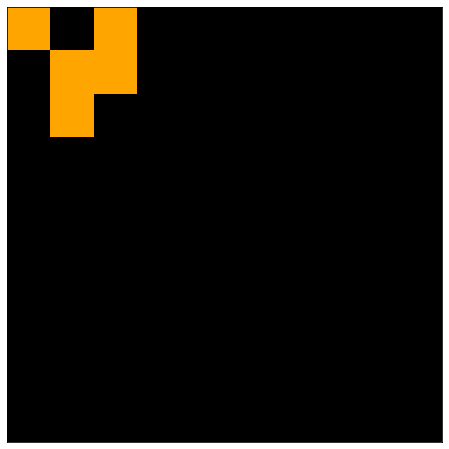

In [14]:
# set the initial plot with the initial universe 

# specify the plot characteristics 
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_aspect(1)
cmap = colors.ListedColormap(['black','orange'])
color_map = ax.imshow(current_universe, cmap=cmap, interpolation='nearest')
ax.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

In [15]:
def get_neighbors(row, column, current_universe, N):
    
    # Assuming that if the index goes out of bounds we take that value to be zero
    top = 0
    bottom = 0
    left = 0
    right = 0 
    top_left = 0 
    top_right = 0 
    bottom_left = 0 
    bottom_right = 0

    if column != N-1:
        right = current_universe[row, column+1]

    if column != 0:
        left = current_universe[row, column-1]

    if row != 0:
        bottom = current_universe[row-1, column]

    if row != N-1:
        top = current_universe[row+1, column]

    if row != 0 and column != N-1:
        bottom_right = current_universe[row-1, column+1]

    if row != N-1 and column != N-1:
        top_right = current_universe[row+1, column+1]

    if row != 0 and column != 0:
        bottom_left = current_universe[row-1, column-1]

    if row != N-1 and column != 0:
        top_left = current_universe[row+1, column-1]
    
    return top, bottom, left, right, top_left, top_right, bottom_left, bottom_right

In [ ]:
def get_neighbors_toroidal(row, column, current_universe, N):
    # Assuming the finite 2D grid to stiched together as in toroidal grid 
    if row == 0:
        r_prev = N-1
    else:
        r_prev = row-1
    
    if row == N-1:
        r_next = 0
    else:
        r_next = row+1
    
    if column == 0:
        c_prev = N-1
    else:
        c_prev = column-1
    
    if column == N-1:
        c_next = 0
    else:
        c_next = column+1
        

        right = current_universe[row, c_next]
        left = current_universe[row, c_prev]
        bottom = current_universe[r_next, column]
        top = current_universe[r_prev, column]
        bottom_right = current_universe[r_next, c_next]
        top_right = current_universe[r_prev, c_next]
        bottom_left = current_universe[r_next, c_prev]
        top_left = current_universe[r_prev, c_prev]
    
    return top, bottom, left, right, top_left, top_right, bottom_left, bottom_right
    
    

In [16]:
# function to move from one step to the other

def alter_universe(frame ,current_universe, color_map, N):
    new_universe = current_universe.copy() 
    for row in range(N):
        for column in range(N):
            # Get the neighboring cell values 
            top, bottom, left, right, top_left, top_right, bottom_left, bottom_right = get_neighbors(row, column, current_universe, N)
            total = top + bottom + left + right + top_left + top_right + bottom_left + bottom_right
            # applying the convay's rules 
            if current_universe[row, column]  == 1: 
                if total < 2 or total > 3: 
                    new_universe[row, column] = 0 
                else:
                    new_universe[row,column] = 1
            else: 
                if total == 3: 
                    new_universe[row, column] = 1
    
    # update data 
    color_map.set_data(new_universe) 
    current_universe[:] = new_universe[:] 
    return color_map, 

In [18]:
# creating a video to view the animation 

# setting the animation attributes such as fps and number of frames.
animation = FuncAnimation(fig, alter_universe, fargs=(current_universe, color_map, N, ),frames=np.arange(1,10, 1), interval=500)
video = animation.to_html5_video()
html = HTML(video)
display(html)
plt.close()